What are the Autonomous Communities of Spain that have most migrated during the crisis? And where were they going?

Spain is one of those multiple countries that suffered a crisis between 2008 and 2015.
This economic recession, among other things, has caused the migration of large numbers of Spanish youth to Europe. What is not known is if the crisis has also been migrated within Spain, INE has published figures for the movement of people between Autonomous Communities (CCAA) within Spain during 2008 and 2015.

I will proceed to carry out a small analysis of these data to know how the crisis has affected the migrations between Autonomous Communities

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import shapefile
from subprocess import check_output

%matplotlib inline
mpl.rcParams['figure.figsize'] = (16.0, 12.0)

print(check_output(["ls", "../input"]).decode("utf8"))

ESP_adm2.cpg
ESP_adm2.csv
ESP_adm2.dbf
ESP_adm2.prj
ESP_adm2.shp
ESP_adm2.shx
ESP_adm_shp
Migrations_Spain_CA_diff.xls
Migrations_Spain_CA_in_out_per.xls
Migrations_Spain_CA_per.xls
Migrations_Spain_CA_source_per.xls



Data has been downloaded from these websites:

[http://www.ine.es/dynt3/inebase/index.htm?type=pcaxis&path=/t20/p277/prov/e02/&file=pcaxis][1]

[http://www.datosmacro.com/demografia/poblacion/espana-comunidades-autonomas][2]

http://www.gadm.org/country


  [1]: http://www.ine.es/dynt3/inebase/index.htm?type=pcaxis&path=/t20/p277/prov/e02/&file=pcaxis
  [2]: http://www.datosmacro.com/demografia/poblacion/espana-comunidades-autonomas

In [2]:
# Interautonomic migration flow per year, Autonomous Community of origin and destination
data_in_out = pd.read_excel('../input/Migrations_Spain_CA_in_out_per.xls', index_col=0)

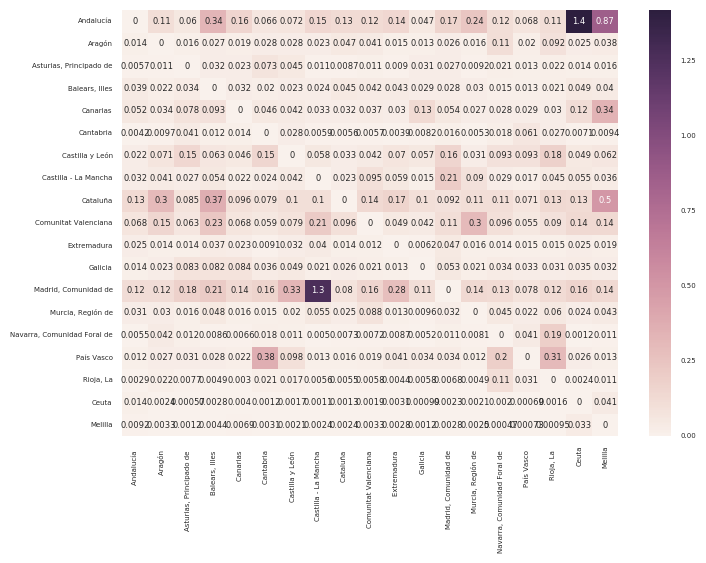

In [3]:
# Interautonomic (CCAA) migration for the year 2008
data_in_out_2008 = data_in_out[data_in_out['Year'] == 2008]
data_in_out_2008 = data_in_out_2008.drop('Year', 1)

# Heatmap with the total data migration of people between you distinguish regions of Spain
sns.set(font_scale=0.5)
sns.heatmap(data_in_out_2008, annot=True) 

The Autonomous Community (region) where most people have migrated in 2008 has been Madrid which is already a small surprise because it is the 3rd autonomous community by number of inhabitants, most of them have gone to Castilla la Mancha which is a C.A. That limits with Madrid and the greater direction to Castilla La Mancha. Madrid is the third.
To have more representative data I will calculate the percentage of people who migrate.

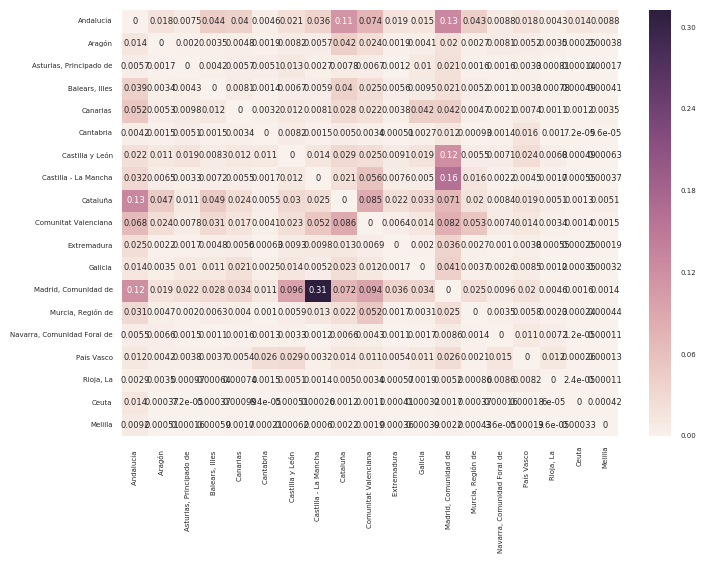

In [4]:
#Percentage of people who migrated in 2008 by autonomous community.
#The percentage is that of regions (C.A.) source
data_in_per = pd.read_excel('../input/Migrations_Spain_CA_source_per.xls', index_col=0)

data_in_per_2008 = data_in_per[data_in_per['Year'] == 2008]
data_in_per_2008 = data_in_per_2008.drop('Year', 1)

# Heatmap with the total data migration of people between you distinguish regions of Spain
sns.set(font_scale=0.5)
sns.heatmap(data_in_per_2008, annot=True) 

Year 2008 (Start of the crisis)
Madrid is at the head of people who have migrated, the 0.31 of its population has moved to Castilla La Mancha 0.12% has gone to Andalucía 0.13 people living in Cataluña moves to Andalucía, although These autonomous communities are far not uncommon as historically the Andalucía have migrated to Cataluña and it is reasonable that in times of crisis some of them are returning.
With respect to Andalucía its inhabitants have migrated mainly to Madrid (0.13%) and Cataluña (0.11%)
It is noteworthy that poorer regions have lower percentages of migration.

I will represent the map of Spain by CCAA indicating the percentages of migration to have a clearer view of the disappearances.

In [5]:
# Function for print map of Spain by colunm
def print_map_spain(year, data, color='Blues') : 
    fig = plt.figure(figsize=(8, 6))
    colors = []
    patches = []
    values = data[year]
        
    colorVotes = plt.get_cmap(color)

    # Los nombres de las CAs ya que son exactamente iguales en los ficheros
    cas = {"ndalu":u"Andalucía", "stur":"Asturias", "rag":u"Aragón", "aleare":"Baleares","anari":"Canarias",
            "antabr":"Cantabria", "y Le":u"Castilla y León", "ancha":"Castilla - La Mancha","atalu":u"Cataluña",
            "alencia":"Comunitat Valenciana", "xtrem":"Extremadura", "alic":"Galicia", "adrid":"Madrid", "urcia":"Murcia", 
            "avarra":"Navarra", "Vasco":u"País Vasco", "ioja":"La Rioja"}

    ax = plt.gca() # get current axes instance

    # Map
    map = Basemap(llcrnrlon=-10.5,llcrnrlat=35,urcrnrlon=4.,urcrnrlat=44.,
             resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = -3.25)
    
    # Download files of http://www.gadm.org/country (http://biogeo.ucdavis.edu/data/gadm2.8/shp/ESP_adm_shp.zip)
    # load the shapefile, use the name 'states'. 
    map.readshapefile('../input/ESP_adm2', 'spain')
    map.drawmapboundary(fill_color='aqua')
    map.drawcoastlines()

    for info, shape in zip(map.spain_info, map.spain):
        for abre_ca, ca in zip(cas.keys(), cas.values()) :
            if info['NAME_1'].find(abre_ca)>=0 :            
                value = float(data[year][data['CA'] == ca])
                # Regla de 3: Max - min -> 1 : value -min -> x
                value_adj = (value - values.min()) / (values.max() - values.min())
                color = colorVotes(value_adj)    
        colors.append(color)
        poly = Polygon(np.array(shape), facecolor=color, edgecolor=color)
        patches.append(poly)                
        ax.add_patch(poly)
 
    pc = PatchCollection(patches, cmap=colorVotes)
    ax.add_collection(pc)

    ax.text(1, 0, 'Migrations CA Spain\nTwitter: @SimOn_kxk\nhttp://labitacora.wordpress.com\nJulian Simon', ha='right', 
            va='bottom', color='#555555', transform=ax.transAxes)

    # Draw color legend.
    #ax_legend = fig.add_axes([0.35, 0.17, 0.3, 0.025], zorder=3)
    ax_legend = fig.add_axes([0.28, 0.19, 0.4, 0.03], zorder=3)
    cmap = mpl.cm.cool
    norm = mpl.colors.Normalize(vmin=values.min(), vmax=values.max())
    cb1 = mpl.colorbar.ColorbarBase(ax_legend, cmap=colorVotes, norm=norm, orientation='horizontal')
    cb1.set_label('Percentage %')

    plt.show()

In [6]:
# Percentages of population of the different Autonomous Communities of Spain that have migrated in these years
data = pd.read_excel('../input/Migrations_Spain_CA_per.xls')

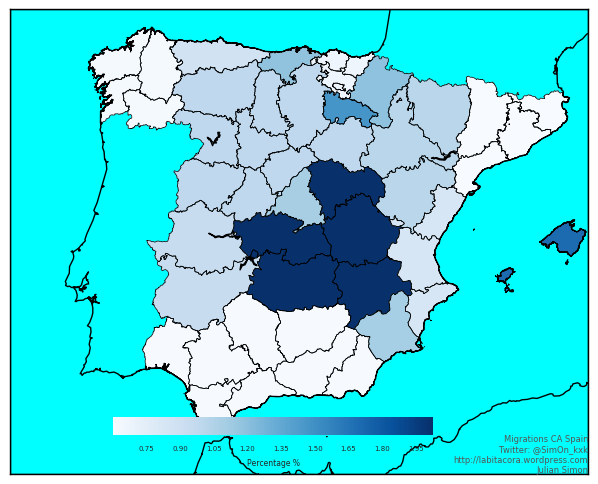

In [7]:
print_map_spain(year='Percentage_source_2008', data=data)

Castilla La Mancha is the C.A. where more of the population has migrated in 2008, which is striking because there are other poorer regions with the lowest percentage.
Surprising the case of Andalucia is one of the poorest and most unemployed CCAA with a very low% migration.
In the opposite case we have the Baleares Islands which is one of the richest regions of Spain and has a high rate of migration, it is possible that it is because life there is expensive as a result of the number of Europeans who have I went to live there in the last years

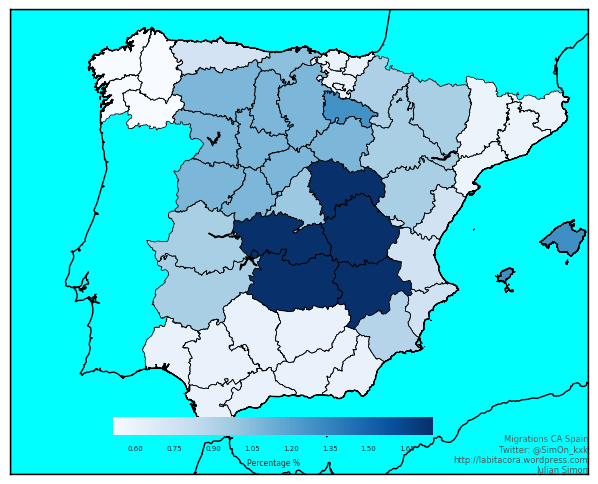

In [8]:
# I make the same map for 2012 to know if it follows the same trend
print_map_spain('Percentage_source_2012', data)

It is observed that the migration is very similar to 2008, the CCAA where the population migrates less are:
Basque Country, Catalonia, Galicia and Andalucia as in 2008 and the more Castilla La Mancha, La Rioja and the Balearic Islands

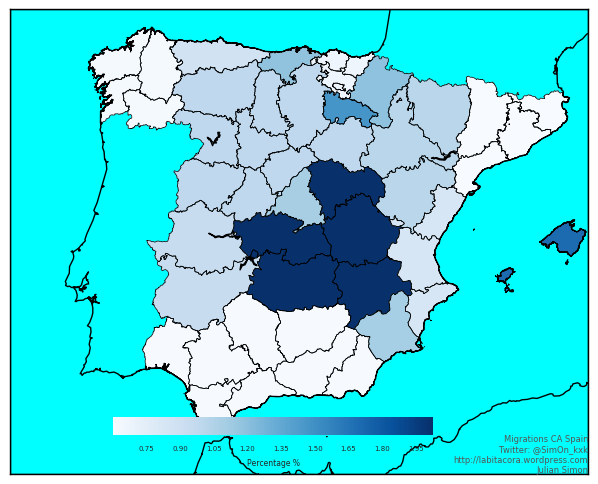

In [9]:
# Now we are going to show the percentages in relation to the inhabitants of the C.A. of destiny
# Year 2008
print_map_spain('Percentage_2008', data)

More or less percentally speaking C.A. That more migrate with those who receive more

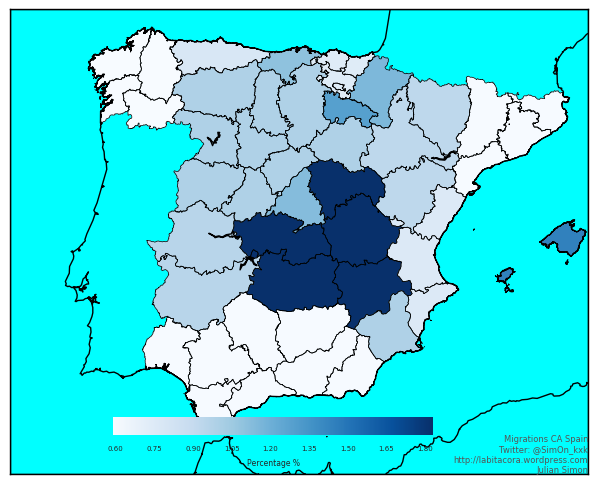

In [10]:
print_map_spain('Percentage_2010', data)

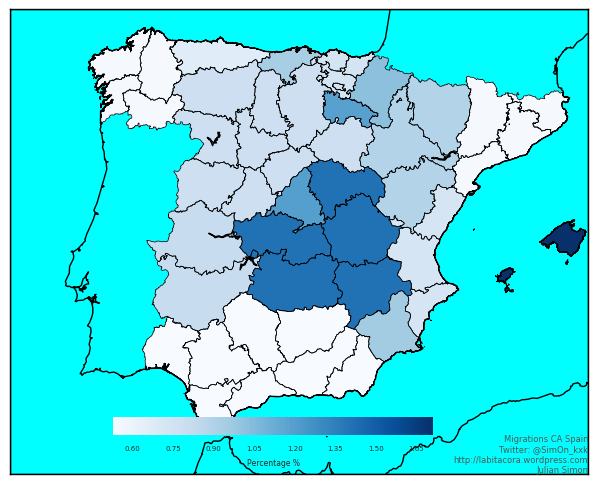

In [11]:
print_map_spain('Percentage_2012', data)

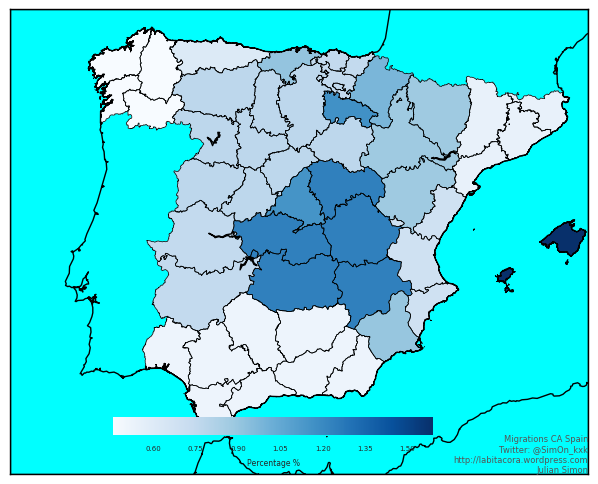

In [12]:
print_map_spain('Percentage_2014', data)

Castilla la Mancha is the C.A. where greater is the difference between the people who leave and those who arrive.
They have arrived more than they have gone
Madrid in contrast is the C.A. that the difference between people who leave and arrive is greater

In [13]:
# Differences between arrivals and people who have migrated by C.A. no longer
data_diff = pd.read_excel('../input/Migrations_Spain_CA_diff.xls')

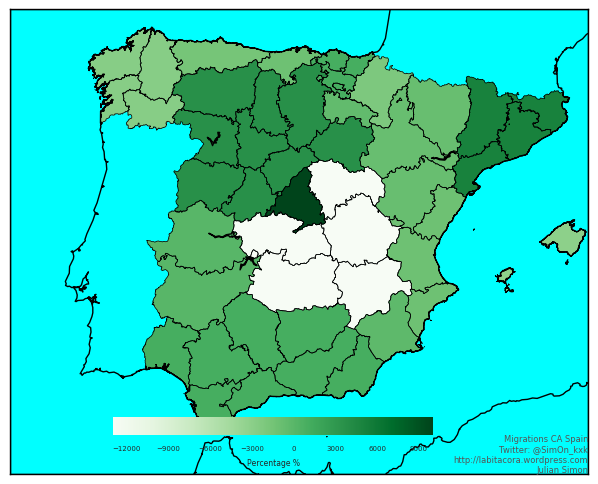

In [14]:
print_map_spain('Migrations_diff', data_diff[ data_diff ['Year'] == 2008], color='Greens')

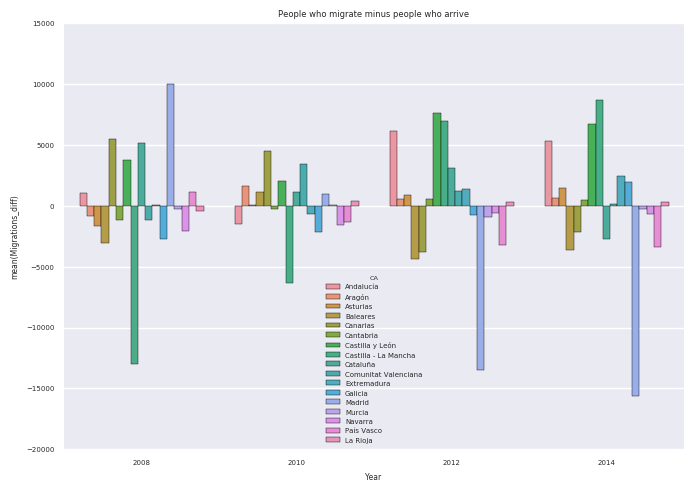

In [15]:
sns.plt.title('People who migrate minus people who arrive')
sns.barplot(x="Year", y="Migrations_diff", hue="CA", data=data_diff)

It is striking the oscillation that occurs in the autonomous communities (CCAA) of Madrid and Castilla La Mancha.
In 2008 Castilla La Mancha is the CA where the difference between the people who go away and the ones who collect this means that the most people arrive by subtracting those that leave and in 2014 is just the opposite, it is the CA that more people are leaving, subtracting those that arrive, has gone from being a receiving community to being a migratory, it seems that the crisis has caused that it happens to be a region that collects people to be a community where it migrates.
C.A. of Madrid is just the reverse, in 2008 it was the Community where the difference between the people who went and received was greater and in 2014 is the C.A. Is on the contrary receives more that migrate with the step of the crisis is being returned to the Capital.

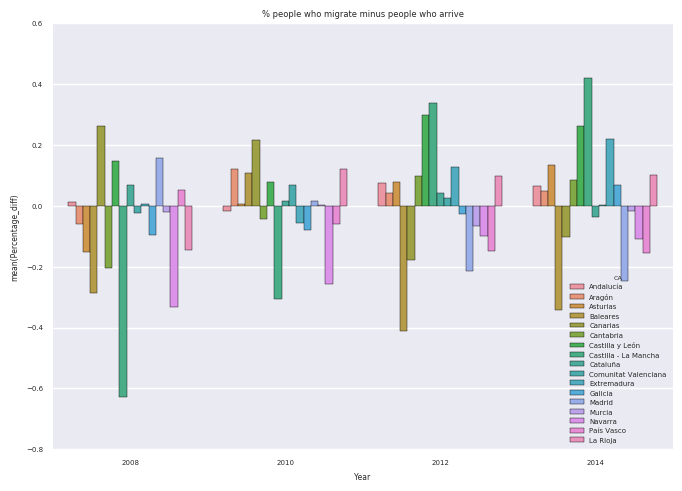

In [16]:
# The percentage differences between arrivals and people who have migrated by C.A. no longer
sns.plt.title('% people who migrate minus people who arrive') 
sns.barplot(x="Year", y="Percentage_diff", hue="CA", data=data_diff)

In the percentage graph of people who migrate less than those who arrive in 2008 we have the C.A. of Castilla La Mancha is where the percentage of people who leave is higher and in 2014 it is the opposite and it is the CA where (%) more people arrive in front of those who leave. The CCAA, which more regularly absorb more people Navarre, Asturias and the Basque Country, and the Autonomous Regions that more % of Castilla-León, La Rioja and Castilla-La Mancha share rural regions with little tourism that, over time, seems to be depopulating in favor of Tourist and industrial regions.